In [1586]:
import pandas as pd
import numpy as np
data=pd.read_csv("online_retail.csv")
data.head(10)

,CustomerID,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate,StockCode,Description,CustomerAge,SpendingScore
0,1288.0,24953.0,6.0,35.17,Spain,01-01-2020 00:00,A,Electronics,67.0,4.0
1,NaN,31237.0,13.0,52.20,United Kingdom,01-01-2020 01:00,D,Toys and Games,28.0,16.0
2,1042.0,24380.0,46.0,93.70,Netherlands,01-01-2020 02:00,B,Clothing,62.0,63.0
3,1849.0,38782.0,79.0,73.65,Spain,01-01-2020 03:00,E,Sports and Outdoors,55.0,42.0
4,1117.0,32953.0,90.0,57.92,France,NaN,C,Home and Kitchen,45.0,33.0
5,1004.0,22588.0,33.0,16.70,Spain,01-01-2020 05:00,C,Home and Kitchen,40.0,13.0
6,1206.0,34815.0,79.0,15.36,Germany,01-01-2020 06:00,B,Clothing,35.0,46.0
7,1634.0,26356.0,62.0,50.47,Germany,01-01-2020 07:00,A,Electronics,37.0,13.0
8,1838.0,29121.0,63.0,73.01,Germany,01-01-2020 08:00,D,Toys and Games,50.0,33.0
9,1344.0,34695.0,56.0,75.23,Netherlands,01-01-2020 09:00,B,Clothing,19.0,NaN


In [1587]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     2993 non-null   float64
 1   InvoiceNo      2995 non-null   float64
 2   Quantity       2991 non-null   float64
 3   UnitPrice      2992 non-null   float64
 4   Country        2991 non-null   object 
 5   InvoiceDate    2985 non-null   object 
 6   StockCode      2991 non-null   object 
 7   Description    2991 non-null   object 
 8   CustomerAge    2993 non-null   float64
 9   SpendingScore  2994 non-null   float64
dtypes: float64(6), object(4)
memory usage: 246.2+ KB


In [1588]:
data.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice,CustomerAge,SpendingScore
count,2993.000000,2995.000000,2991.000000,2992.000000,2993.000000,2994.00000
mean,1499.180755,30031.097830,50.636576,50.549412,43.329435,49.98998
std,284.509488,5723.700274,28.427752,28.938019,15.056258,28.66441
min,1000.000000,20010.000000,1.000000,0.510000,18.000000,1.00000
25%,1257.000000,25190.500000,26.000000,24.840000,30.000000,26.00000
50%,1504.000000,30035.000000,52.000000,51.055000,43.000000,50.00000
75%,1739.000000,34977.500000,75.000000,75.375000,56.000000,75.00000
max,1999.000000,39999.000000,99.000000,99.970000,69.000000,99.00000


In [1589]:
#converting to the correct date time format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True)

In [1590]:

data.isnull().sum()

CustomerID       157
InvoiceNo        155
Quantity         159
UnitPrice        158
Country          159
InvoiceDate      165
StockCode        159
Description      159
CustomerAge      157
SpendingScore    156
dtype: int64

In [1591]:
data.isnull().mean()*100

CustomerID       4.984127
InvoiceNo        4.920635
Quantity         5.047619
UnitPrice        5.015873
Country          5.047619
InvoiceDate      5.238095
StockCode        5.047619
Description      5.047619
CustomerAge      4.984127
SpendingScore    4.952381
dtype: float64

In [1592]:
#handling the null values
data['CustomerID']=data['CustomerID'].fillna(data["CustomerID"].mode()[0])
data['InvoiceNo']=data['InvoiceNo'].fillna(data["InvoiceNo"].mode()[0])
data['Quantity']=data['Quantity'].fillna(data["Quantity"].mode()[0])
data['UnitPrice']=data['UnitPrice'].fillna(data["UnitPrice"].median())
data['InvoiceDate']=data['InvoiceDate'].fillna(data["InvoiceDate"].median())
data['Country']=data['Country'].fillna(data["Country"].mode()[0])
data['Description']=data['Description'].fillna(data["Description"].mode()[0])
data['CustomerAge']=data['CustomerAge'].fillna(data["CustomerAge"].mean())
data['SpendingScore']=data['SpendingScore'].fillna(data["SpendingScore"].mean())

In [1593]:
#remove stockcode as description and the stockcode represent the same thing
data=data.drop('StockCode',axis=1)

In [1594]:
data.duplicated().sum()

150

In [1595]:
#handling the duplicate values
data=data.drop_duplicates()

In [1596]:
#creating a new col of total amount spend from price and quantity
data.loc[:,"Totalspend"]=data['UnitPrice']*data["Quantity"]

In [1597]:
#Aggregating the different invoices of same customer
grouped_data=data.groupby("CustomerID").agg({"InvoiceNo":"nunique","Totalspend":"sum","CustomerAge":"mean","SpendingScore":"mean"}).reset_index()
grouped_data

,CustomerID,InvoiceNo,Totalspend,CustomerAge,SpendingScore
0,1000.0,3,4957.98,33.000000,29.333333
1,1001.0,2,1965.92,28.000000,50.500000
2,1002.0,2,7819.25,32.500000,40.000000
3,1003.0,2,3974.06,51.000000,34.994990
4,1004.0,3,8009.99,44.666667,37.666667
...,...,...,...,...,...
942,1995.0,2,1193.36,45.500000,33.000000
943,1996.0,1,2618.70,42.000000,54.000000
944,1997.0,4,10879.65,36.500000,39.500000
945,1998.0,6,16949.76,40.166667,55.500000


In [1598]:
#Aggregating the country based on the customer
country_group=data.groupby("CustomerID")["Country"].agg(lambda x:x.mode()[0]).reset_index()

In [1599]:
#creating a feature recency in days based on the given timestamp
max_date=data["InvoiceDate"].max()
recency_grouped=data.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency_grouped["recency"]=(max_date-recency_grouped["InvoiceDate"]).dt.days
recency_grouped["recency"]

0       1
1      16
2       5
3      40
4      44
       ..
942    67
943    70
944    24
945    14
946    32
Name: recency, Length: 947, dtype: int64

In [1600]:
#creating a feature named day as it can help can has the customer bought in which days of a week
data.loc[:,"day"]=data["InvoiceDate"].dt.dayofweek
day_grouped=data.groupby("CustomerID")["day"].agg(lambda x:x.mode()[0]).reset_index()

In [1601]:
#merging the above created features
df=grouped_data.merge(country_group,on="CustomerID").merge(recency_grouped,on="CustomerID").merge(day_grouped,on="CustomerID")


In [1602]:
#creating the pivot table for type of items they bought in count and merging the table with the df dataframe
desc_pivot = data.pivot_table(index="CustomerID", columns="Description", values="InvoiceNo", aggfunc="count", fill_value=0).reset_index()
df = df.merge(desc_pivot, on="CustomerID", how="left").fillna(0)


In [1603]:

df=df.rename(columns={"InvoiceNo":"orders"})
df.head()
df.loc[:,'Quantity']=data['Quantity']

In [1604]:
#dropping unwanted columns
df=df.drop(['CustomerID','InvoiceDate'],axis=1)
df.head()

,orders,Totalspend,CustomerAge,SpendingScore,Country,recency,day,Clothing,Electronics,Home and Kitchen,Sports and Outdoors,Toys and Games,Quantity
0,3,4957.98,33.000000,29.333333,Spain,1,6,0,1,1,1,0,6.0
1,2,1965.92,28.000000,50.500000,France,16,4,0,0,1,1,0,13.0
2,2,7819.25,32.500000,40.000000,Netherlands,5,2,0,0,1,0,1,46.0
3,2,3974.06,51.000000,34.994990,United Kingdom,40,2,1,0,1,0,0,79.0
4,3,8009.99,44.666667,37.666667,Netherlands,44,2,2,0,1,0,0,90.0


In [1605]:
#EDA for the kmeans algorithm
import matplotlib.pyplot as plt
import seaborn as sns
num=df.select_dtypes(include=['int64','float64']).columns
num

Index(['orders', 'Totalspend', 'CustomerAge', 'SpendingScore', 'recency',
       'Clothing', 'Electronics', 'Home and Kitchen', 'Sports and Outdoors',
       'Toys and Games', 'Quantity'],
      dtype='object')

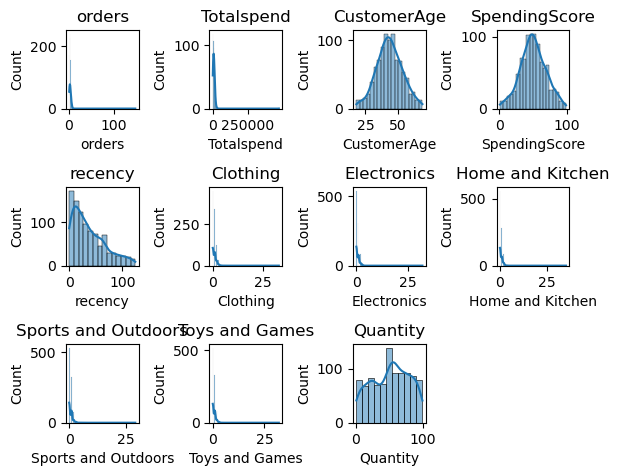

In [1606]:
#univariate analysis
plt.figure(figsize=(6,6))
for i in range(len(num)):
    plt.subplot(4,4,i+1)
    sns.histplot(df[num[i]],kde=True)
    plt.title(num[i])
    plt.tight_layout()
plt.show()


In [1607]:
df['Country'].value_counts()

Country
France            303
Germany           284
Netherlands       142
Spain             124
United Kingdom     94
Name: count, dtype: int64

(0.0, 500000.0)

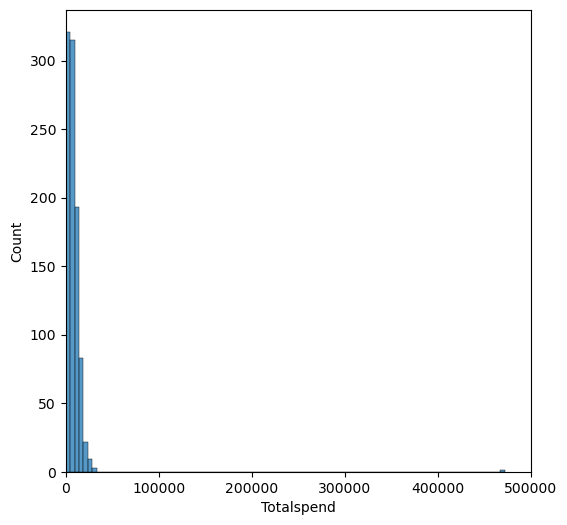

In [1608]:
plt.figure(figsize=(6,6))
sns.histplot(df["Totalspend"], bins=100)
plt.xlim(0, 500000) 

<Figure size 2000x2000 with 0 Axes>

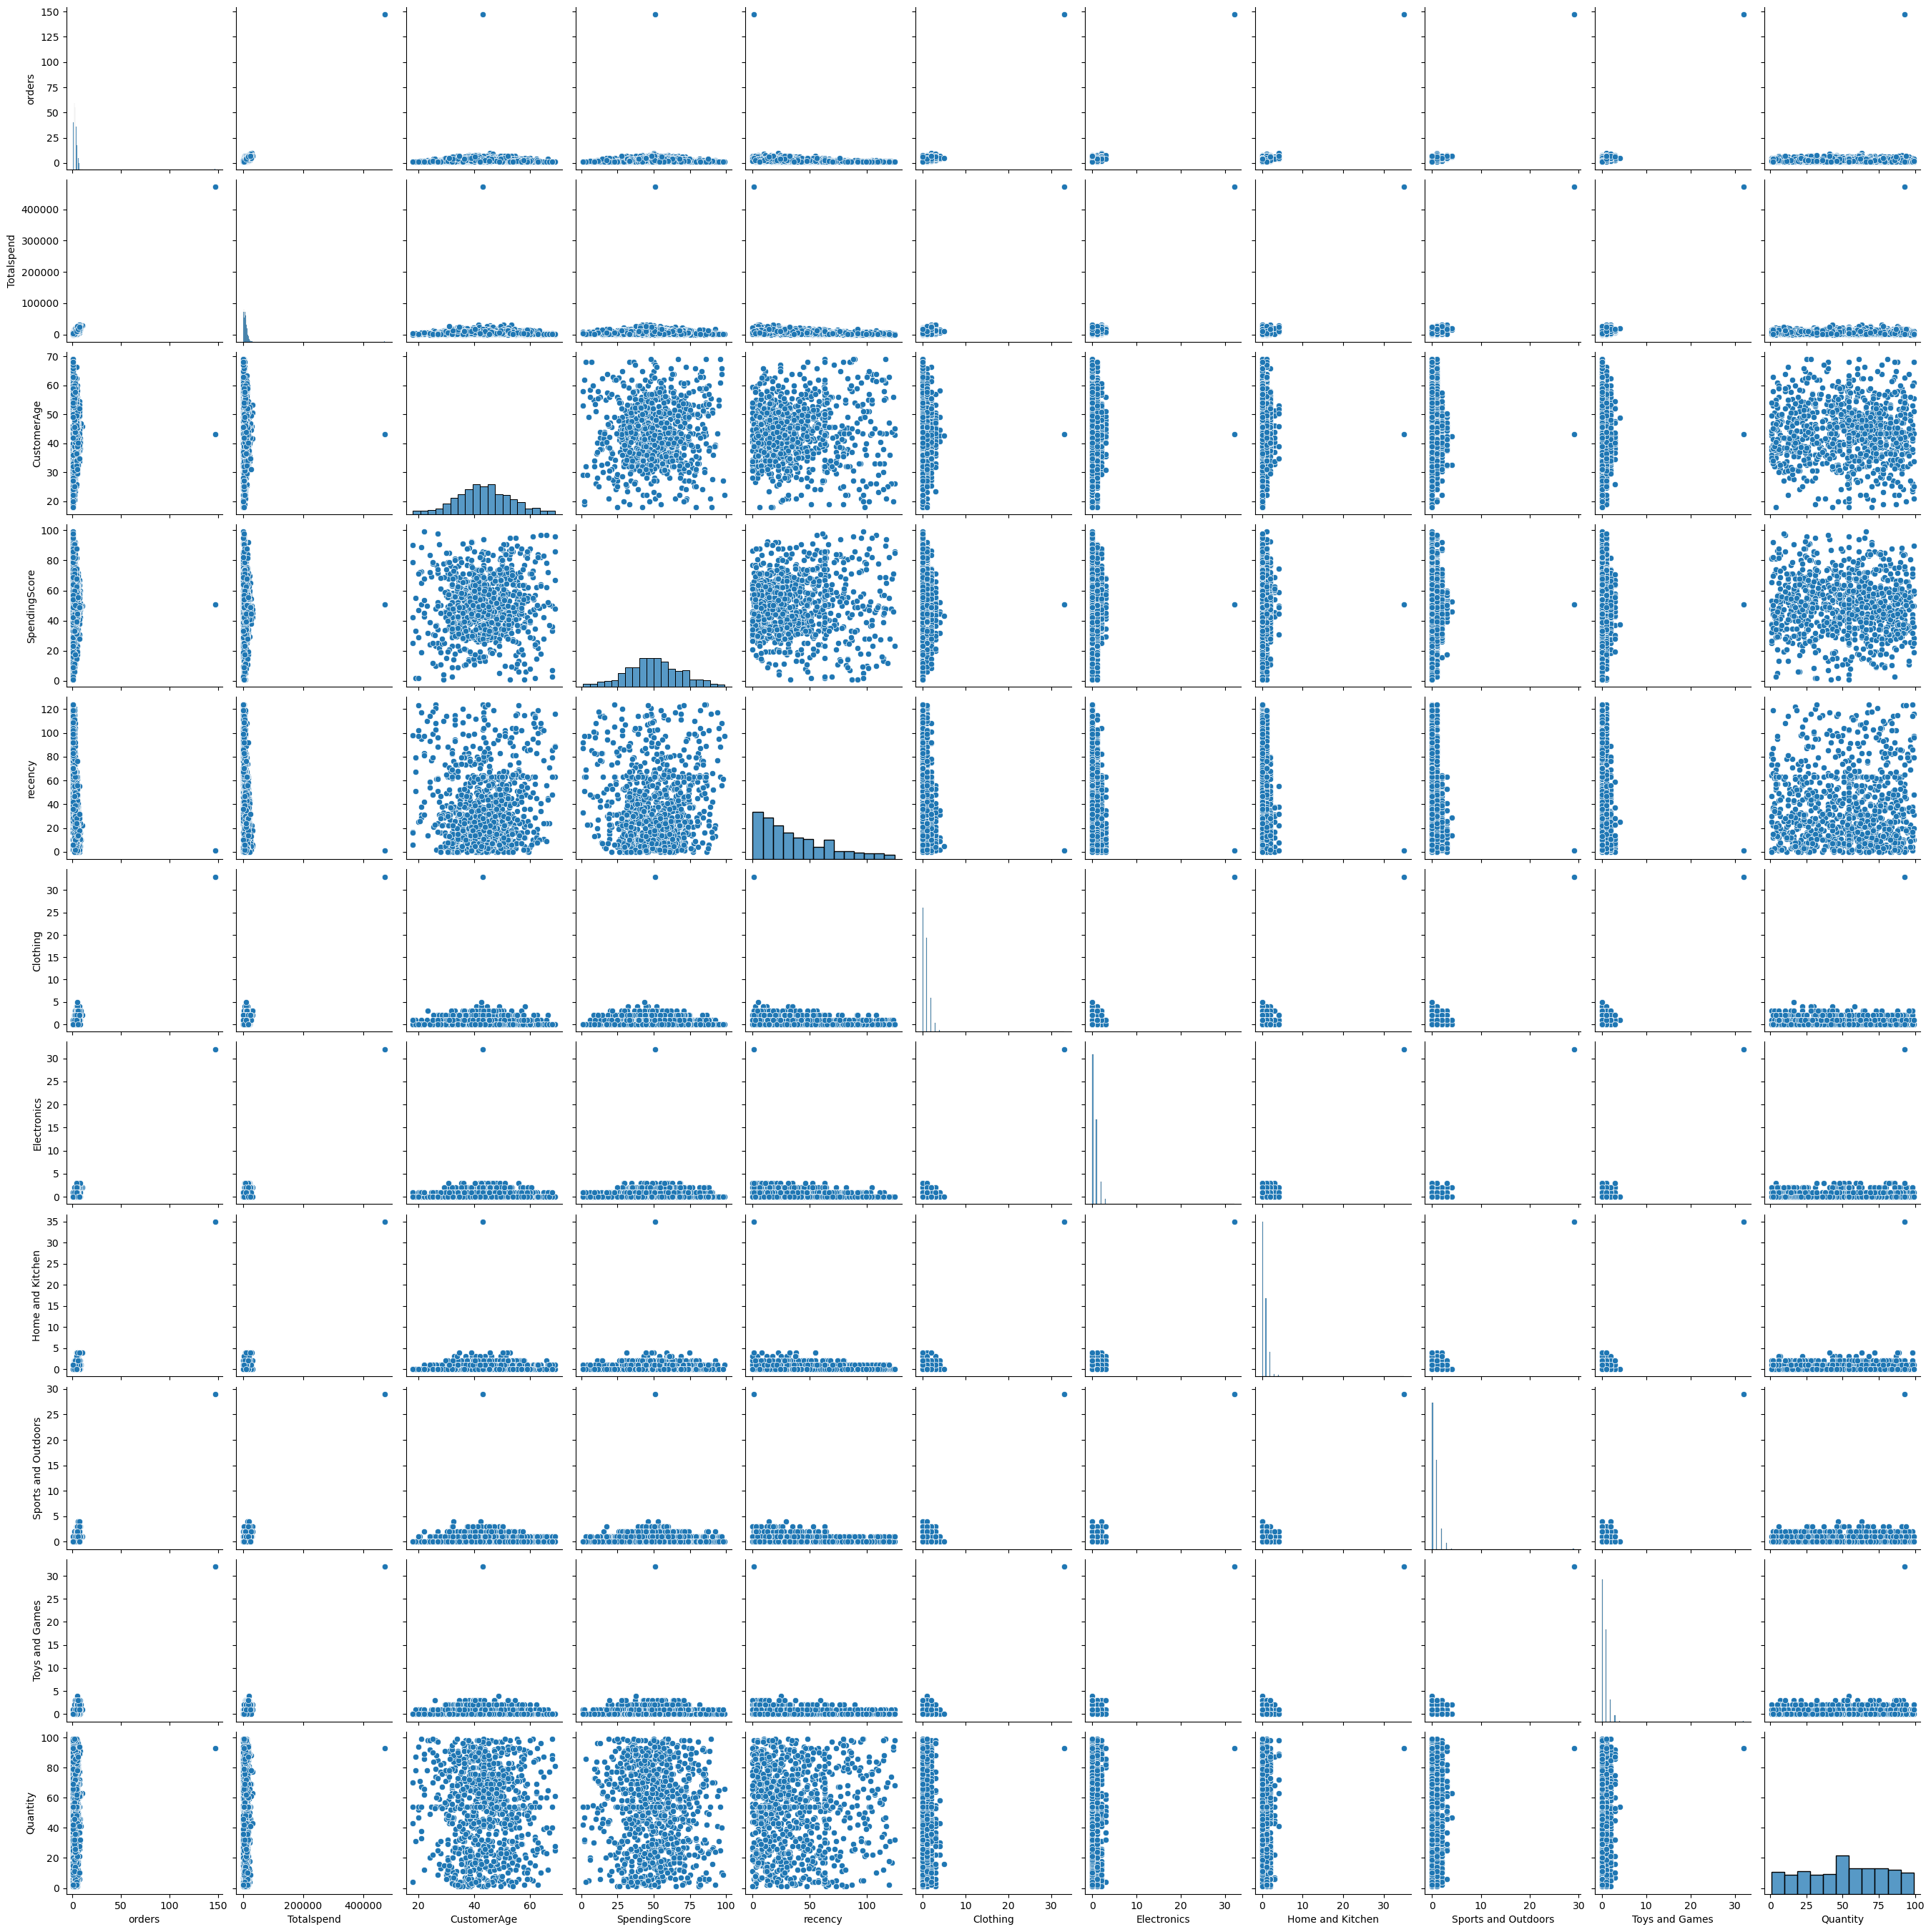

In [1609]:
#bivariate analysis
plt.figure(figsize=(20,20))
sns.pairplot(df[num])

<Axes: xlabel='Country', ylabel='Totalspend'>

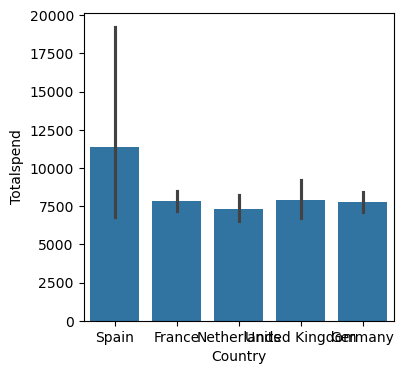

In [1610]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='Country',y='Totalspend')

In [1611]:
#Doing log transformation to get rid of skewness
df['Totalspend'] = np.log1p(df['Totalspend'])
df['Quantity'] = np.log1p(df['Quantity'])
df['CustomerAge']=np.log1p(df['CustomerAge'])


In [1612]:
#correlation matrix
df[num].corr()

,orders,Totalspend,CustomerAge,SpendingScore,recency,Clothing,Electronics,Home and Kitchen,Sports and Outdoors,Toys and Games,Quantity
orders,1.000000,0.321322,0.009799,-0.008795,-0.191706,0.827293,0.839032,0.859600,0.815991,0.839243,0.035579
Totalspend,0.321322,1.000000,0.027853,-0.030376,-0.444477,0.278055,0.244028,0.247035,0.246922,0.266045,0.007856
CustomerAge,0.009799,0.027853,1.000000,0.034709,-0.018088,0.019600,0.016626,0.017106,0.002317,-0.017539,-0.009359
SpendingScore,-0.008795,-0.030376,0.034709,1.000000,0.029652,-0.061085,0.011383,0.004256,0.016094,0.000804,-0.026875
recency,-0.191706,-0.444477,-0.018088,0.029652,1.000000,-0.169569,-0.159674,-0.131436,-0.134851,-0.156774,0.012479
Clothing,0.827293,0.278055,0.019600,-0.061085,-0.169569,1.000000,0.595831,0.624367,0.591524,0.621554,-0.012453
Electronics,0.839032,0.244028,0.016626,0.011383,-0.159674,0.595831,1.000000,0.676190,0.613793,0.637680,0.045927
Home and Kitchen,0.859600,0.247035,0.017106,0.004256,-0.131436,0.624367,0.676190,1.000000,0.632136,0.651510,0.037739
Sports and Outdoors,0.815991,0.246922,0.002317,0.016094,-0.134851,0.591524,0.613793,0.632136,1.000000,0.607065,0.038023
Toys and Games,0.839243,0.266045,-0.017539,0.000804,-0.156774,0.621554,0.637680,0.651510,0.607065,1.000000,0.042667


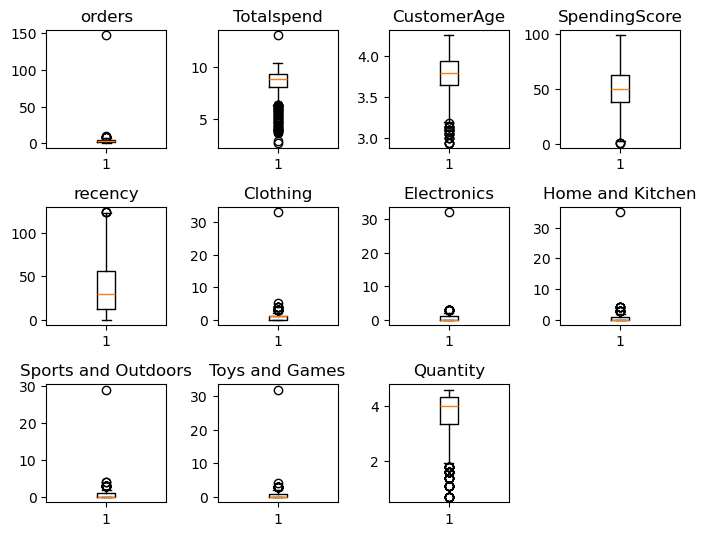

In [1613]:
#box plot to detect the outliers
plt.figure(figsize=(7,7))
for i in range(len(num)):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[num[i]])
    plt.title(num[i])
    plt.tight_layout()
plt.show()

In [1614]:
#handling the outliers
def outliers(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    print(l,u)
    data[col]=np.where(data[col]<l,l,np.where(data[col]>u,u,data[col]))
for i in num:
    outliers(df,i)

-1.0 7.0
6.327268797243807 11.075129886791974
3.186454928697685 4.389471544774221
1.1765030060120125 99.37249498997997
-54.75 123.25
-1.5 2.5
-1.5 2.5
-1.5 2.5
-1.5 2.5
-1.5 2.5
1.9320734845992045 5.75933307229859


In [1615]:
#one hot encoding for the countries 
df=pd.get_dummies(data=df,columns=['Country'],drop_first=True)

df=df.drop('day',axis=1)


In [1616]:
#data normalization by using the standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)
df_scaled

array([[ 0.00750104, -0.11983158, -1.08844443, ..., -0.41999704,
         2.57625635, -0.33196279],
       [-0.63827011, -1.10370246, -1.78587145, ..., -0.41999704,
        -0.38816013, -0.33196279],
       [-0.63827011,  0.36481668, -1.15340191, ...,  2.38096915,
        -0.38816013, -0.33196279],
       ...,
       [ 0.65327219,  0.71620798, -0.65884448, ..., -0.41999704,
         2.57625635, -0.33196279],
       [ 1.94481449,  1.18788691, -0.24981892, ..., -0.41999704,
        -0.38816013, -0.33196279],
       [ 2.59058564,  1.54046442, -0.88454367, ..., -0.41999704,
        -0.38816013, -0.33196279]])

In [1617]:
#dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_scaled = pca.fit_transform(df_scaled)


In [1618]:
#elbow curve to detect the optimized k value
import os
os.environ["OMP_NUM_THREADS"] = "4"

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


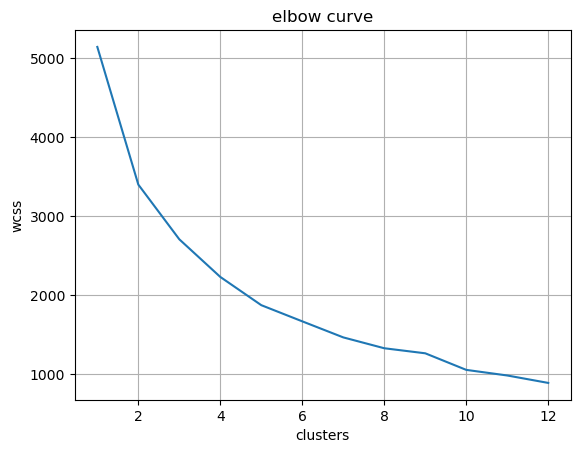

In [1619]:
plt.plot(range(1,13),wcss)
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.title("elbow curve")
plt.grid()
plt.show()

In [1620]:
#kmeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters


<Axes: xlabel='Cluster', ylabel='Totalspend'>

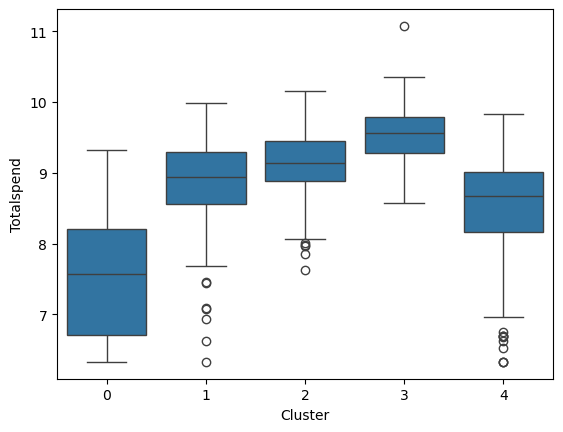

In [1621]:

sns.boxplot(x='Cluster',y='Totalspend',data=df)


<Axes: xlabel='PCA1', ylabel='PCA2'>

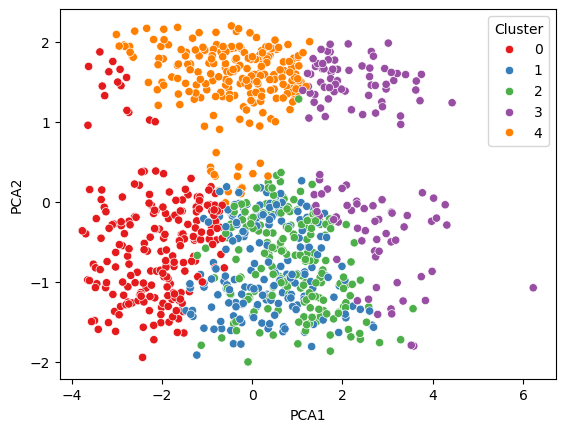

In [1622]:
#pca to vizualize the clusters by using the scatter plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')

In [1623]:
#silhouette_score 
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.29704548739893416


In [1624]:
#summary of the clusters
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,orders,Totalspend,CustomerAge,SpendingScore,recency,Clothing,Electronics,Home and Kitchen,Sports and Outdoors,Toys and Games,Quantity,Country_Germany,Country_Netherlands,Country_Spain,Country_United Kingdom,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,
0,1.367925,7.508384,3.764714,53.626248,69.431604,0.330189,0.231132,0.235849,0.297170,0.278302,3.728914,0.070755,0.155660,0.226415,0.150943,-2.126946,-0.498114
1,3.115183,8.843255,3.828402,53.884311,25.916230,0.463351,0.795812,0.835079,0.494764,0.471204,3.911182,0.000000,0.502618,0.120419,0.005236,0.316413,-0.812868
2,3.673267,9.127457,3.750072,49.724877,27.000000,1.222772,0.470297,0.381188,0.554455,0.943069,3.562840,0.004950,0.024752,0.217822,0.301980,0.857250,-0.737456
3,5.487805,9.545277,3.773656,49.077708,14.520325,1.142276,0.943089,1.113821,1.178862,0.939024,3.885906,0.528455,0.065041,0.073171,0.000000,2.478451,0.594410
4,2.410959,8.520482,3.760427,45.138013,38.366438,0.607306,0.484018,0.365297,0.525114,0.417808,3.765622,0.926941,0.000000,0.000000,0.000000,-0.399710,1.537496


In [1625]:
# Group by cluster and calculate summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Totalspend': ['mean', 'median', 'max', 'min'],
    'CustomerAge': 'mean',
    'SpendingScore': 'mean',
    'recency': 'mean',
    'orders': 'mean'
}).round(2)
cluster_summary


Totalspend                     CustomerAge SpendingScore recency  \
              mean median    max   min        mean          mean    mean   
Cluster                                                                    
0             7.51   7.57   9.32  6.33        3.76         53.63   69.43   
1             8.84   8.93   9.98  6.33        3.83         53.88   25.92   
2             9.13   9.14  10.15  7.63        3.75         49.72   27.00   
3             9.55   9.57  11.08  8.57        3.77         49.08   14.52   
4             8.52   8.68   9.84  6.33        3.76         45.14   38.37   

        orders  
          mean  
Cluster         
0         1.37  
1         3.12  
2         3.67  
3         5.49  
4         2.41